In [2]:
# comparison between the numerics result and the experimental data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors

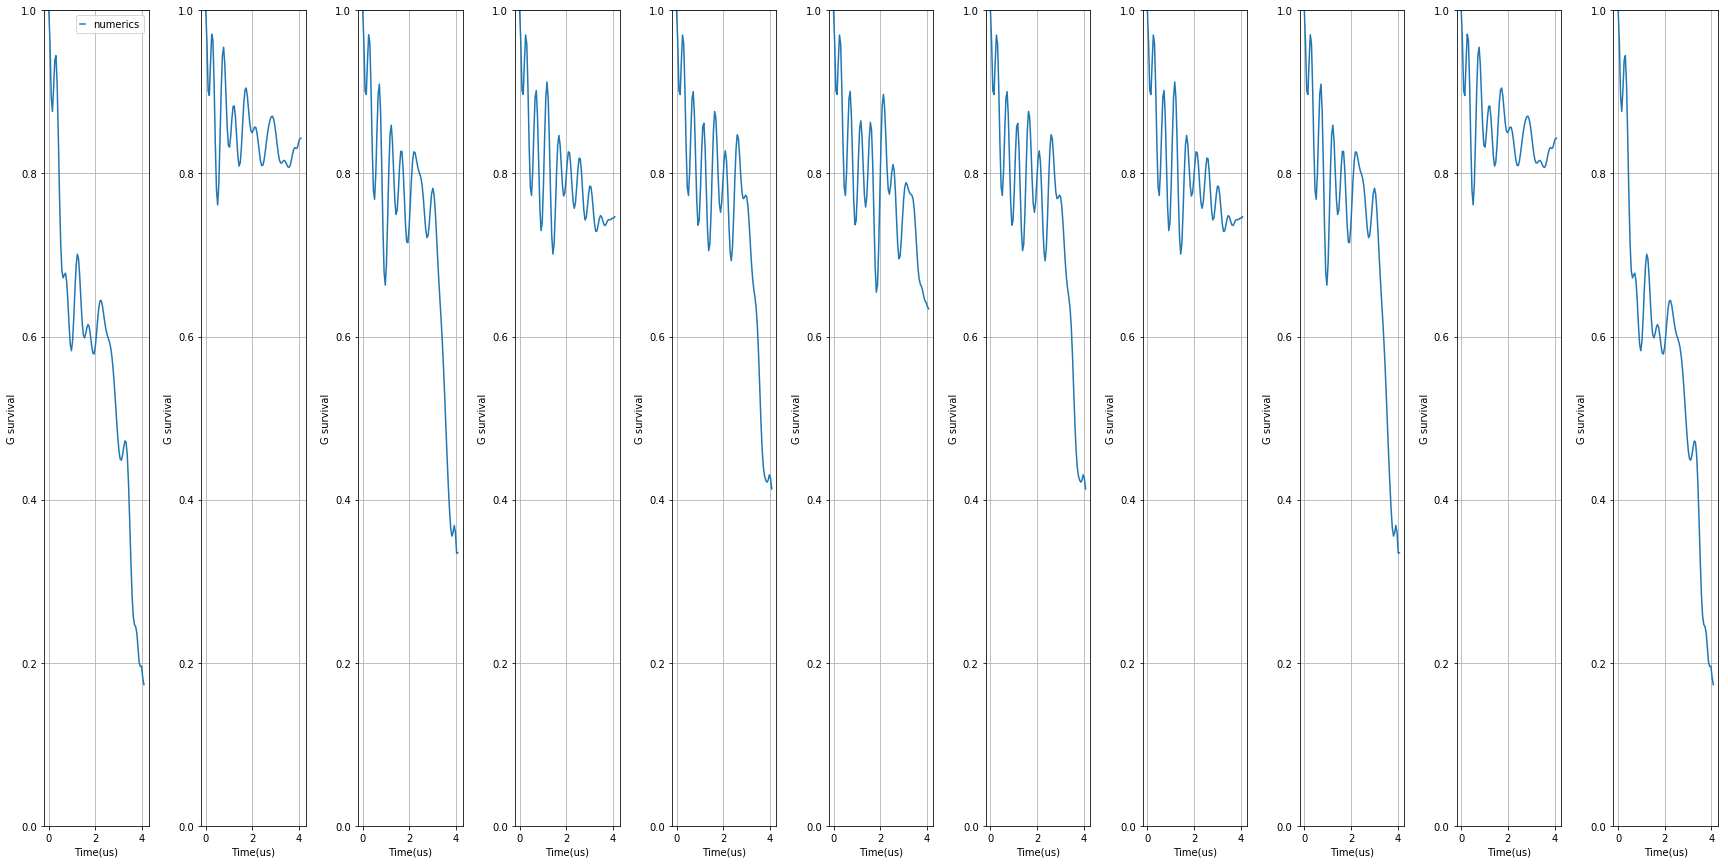

In [15]:
#11*1
#data_exp = np.loadtxt('./rydberg_data/9_6_1dexpramp$/11_1_-5_5_new.csv',delimiter=',')
data = {}
for params in [(11,1,0.0,-4,6,0.686,4,0.051,0,0.25)]:
    data[params] = {}
    data[params]['z'] = np.loadtxt("./rydberg_data/9_6_1dexpramp/z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_ramptime%.3f_dt%.3f_No%dtau1%3f.csv"%params,delimiter=',')
params = (11,1,0.0,-4,6,0.686,4,0.051,0,0.25)
dt = params[7]
temp = data[params]['z']
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(30,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    #ax[i].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(np.arange(len(temp[:,i]))*dt,1-(temp[:,i]+1)/2,ls='-',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
  #  ax[i].set_xticks([0,1,2])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()


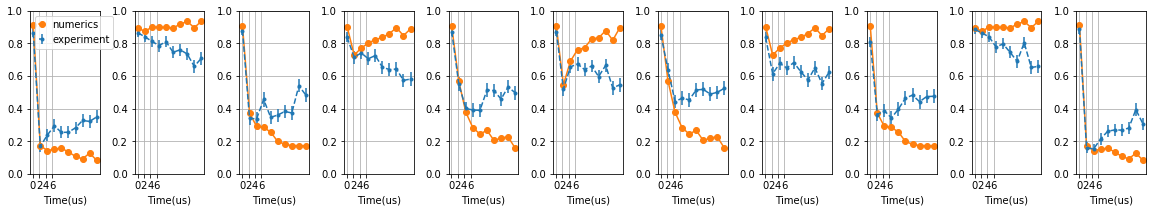

In [3]:
#11*1
data_exp = np.loadtxt('./rydberg_data/9_8_1d_ramptime_sweep/11_1_sweeptime.csv',delimiter=',')
data = {}

#sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0
# for params in [(11,1,0.0,-4,5,0.722,4,0.051,0)]:
#     data[params] = {}
#     data[params]['z'] = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_dt%.3f_No%d.csv"%params,delimiter=',')
params = (11,1,0.0,-4,5,0.722,4,0.051,0)
dt = params[7]
#temp = data[params]['z']
temp = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0.csv",delimiter=',')
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(20,3))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    ax[i].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(data_exp[0,:],1-(temp[:,i]+1)/2,marker='o',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
    ax[i].set_xticks([0,2,4,6])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    #ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()

[0.         0.00056445 0.00592826 0.01700792 0.02809722 0.03243934
 0.0272847  0.01615697 0.0086828  0.01560161 0.04355349 0.09202465
 0.15664092]
[ 0.05265 -0.06517  0.41894  0.7094   0.85379  2.09832  2.1627   2.92613
  3.01119  3.55523  3.42316  3.26771  2.94286]


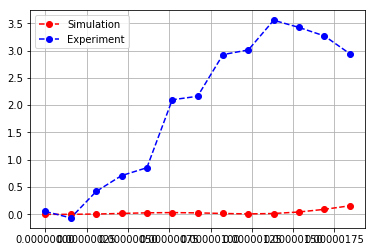

In [16]:
#temp[site,time]
Lt = len(data_exp[0,:])
site = 11
sigma_sim = np.zeros(Lt)
sigma_exp = np.zeros(Lt)
data_exp_survival = data_exp[1:11,:]
x = data_exp[0,:]
for j in range(Lt):
    for i in range(site-1-1):
        sigma_sim[j] = sigma_sim[j]+((1-(temp[j,i]+1)/2)-(1-(temp[j,i+1]+1)/2))*(-1)**(i+1)
        sigma_exp[j] = sigma_exp[j]+(data_exp_survival[i,j]-data_exp_survival[i+1,j])*(-1)**(i+1)
print(sigma_sim)
print(sigma_exp)
plt.plot(x, sigma_sim, color='r',marker='o',linestyle='dashed',label='Simulation')
plt.plot(x, sigma_exp, color='b',marker='o',linestyle='dashed',label='Experiment')
plt.legend()
plt.grid()

In [10]:
#11*1
data_exp = np.loadtxt('./rydberg_data/9_8_1d_crit_detuning_sweep/11_1_crit_detuning_sweep.csv',delimiter=',')
data = {}

#sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0
# for params in [(11,1,0.0,-4,5,0.722,4,0.051,0)]:
#     data[params] = {}
#     data[params]['z'] = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_dt%.3f_No%d.csv"%params,delimiter=',')
params = (11,1,0.0,-4,5,0.722,4,0.051,0)
dt = params[7]
#temp = data[params]['z']
temp = np.loadtxt("./rydberg_data/9_8_1d_crit_detuning_sweep/sweepcrit_delta_z_L11_1_den0.000_delta-5.0_6.0_omega0.746_dt0.051_No0tau1_0.400000.csv",delimiter=',')
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(20,3))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    ax[i].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(data_exp[0,:],1-(temp[:,i]+1)/2,marker='o',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
    ax[i].set_xticks([-2,0,2,4,6])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('detuning(MHz)')
    #ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()

OSError: ./rydberg_data/9_8_1d_crit_detuning_sweep/11_1_crit_detuning_sweep.csv not found.

In [13]:
temp_shift = np.array([[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-0.9275512789044139, -0.9284291218116953, -0.928442677939096, -0.928444077393639, -0.9284443348090976, -0.9284443821829167, -0.9284443348090978, -0.928444077393639, -0.928442677939096, -0.9284291218116953, -0.9275512789044139], [-0.7685928826427018, -0.7802544786134726, -0.7806592432731485, -0.7806974417155679, -0.7807053163843785, -0.7807068234264134, -0.7807053163843795, -0.7806974417155679, -0.7806592432731488, -0.7802544786134727, -0.7685928826427005], [-0.5935425718603233, -0.6404684483063297, -0.6423983409459231, -0.6425275871565126, -0.6425628626424463, -0.6425701864997759, -0.6425628626424492, -0.642527587156513, -0.6423983409459235, -0.6404684483063304, -0.5935425718603211], [-0.42774001835121145, -0.5448126441636586, -0.5483803778928118, -0.5483914247661033, -0.5484533975317719, -0.5484686102591263, -0.5484533975317769, -0.5483914247661044, -0.5483803778928111, -0.5448126441636602, -0.427740018351208], [-0.27227388365411065, -0.4978454598364757, -0.498691573273469, -0.4979000189480517, -0.4979535269058752, -0.497971493758291, -0.49795352690588096, -0.4979000189480534, -0.49869157327346725, -0.49784545983647877, -0.2722738836541051], [-0.12186153912764011, -0.4903349560941472, -0.47662502928927697, -0.4742667065892666, -0.47431622897314096, -0.474328757222945, -0.47431622897314585, -0.47426670658926884, -0.47662502928927475, -0.49033495609415134, -0.12186153912763242], [0.026452702938486627, -0.509025595537403, -0.4602814226484384, -0.4567233478796238, -0.45695019670358833, -0.456953671714876, -0.45695019670359094, -0.4567233478796262, -0.4602814226484365, -0.5090255955374079, 0.026452702938496525], [0.17017762524756047, -0.5412838809478587, -0.42998277712172295, -0.4287527416695954, -0.429573558195003, -0.42955843730915677, -0.42957355819500254, -0.428752741669598, -0.4299827771217214, -0.5412838809478655, 0.17017762524757096], [0.3009686795198465, -0.5793533100434416, -0.37523251249851663, -0.38555498739918737, -0.3872130021250375, -0.38711474100504356, -0.3872130021250337, -0.38555498739918964, -0.37523251249851464, -0.5793533100434503, 0.3009686795198564], [0.40783954620983787, -0.6207148674030651, -0.296718076433647, -0.3351268898330483, -0.33634913508298203, -0.33606204898801983, -0.3363491350829753, -0.33512688983305045, -0.2967180764336438, -0.6207148674030749, 0.4078395462098477], [0.4835106193406532, -0.664585315770557, -0.20298666515067082, -0.291893018660383, -0.2878816051224252, -0.28760079665465926, -0.2878816051224165, -0.2918930186603847, -0.20298666515066546, -0.6645853157705663, 0.4835106193406632], [0.529197578230949, -0.7099912400521391, -0.1070414558369051, -0.2693215388162864, -0.2505706521026008, -0.251492102598844, -0.25057065210259166, -0.26932153881628784, -0.10704145583689764, -0.7099912400521472, 0.5291975782309591], [0.5545638104007049, -0.7554128296971474, -0.023158618604040733, -0.27416983321676436, -0.22784948277684702, -0.23260974190418549, -0.22784948277683847, -0.2741698332167666, -0.023158618604031053, -0.7554128296971542, 0.5545638104007143], [0.5738128804126771, -0.7981279599562607, 0.03759037071039263, -0.3033506508053796, -0.2171685657791067, -0.2294161842246172, -0.21716856577909938, -0.3033506508053829, 0.03759037071040337, -0.7981279599562662, 0.5738128804126841], [0.6003468672792274, -0.8341058562992755, 0.07142820934769921, -0.345421159156394, -0.21143627421896766, -0.2351719213558743, -0.21143627421896194, -0.3454211591563985, 0.0714282093477088, -0.8341058562992802, 0.6003468672792317], [0.6414553442973625, -0.8595718745611054, 0.08297250045649204, -0.38569634381463963, -0.20154996992544494, -0.24154412578512816, -0.20154996992544083, -0.38569634381464524, 0.08297250045649879, -0.8595718745611104, 0.6414553442973644], [0.6939843739750605, -0.8739629221418781, 0.08259297868271569, -0.41259117745967316, -0.1797777597930115, -0.24294750021380226, -0.17977775979300825, -0.41259117745967877, 0.08259297868271864, -0.8739629221418832, 0.6939843739750611], [0.7443545572137191, -0.881464350571838, 0.08202425308141538, -0.423000174338173, -0.1436535022361444, -0.23915024878926225, -0.14365350223614082, -0.42300017433817827, 0.08202425308141492, -0.8814643505718434, 0.7443545572137202], [0.7763327573359675, -0.8882610019047644, 0.09107487539359407, -0.4232595159888591, -0.09813101587291587, -0.23327190454784713, -0.09813101587291151, -0.423259515988864, 0.09107487539359216, -0.8882610019047699, 0.7763327573359712], [0.7839576209530407, -0.8975201696312052, 0.11680881774557852, -0.4241878286364509, -0.054290836907519374, -0.22611142557898256, -0.054290836907514406, -0.4241878286364557, 0.11680881774557786, -0.8975201696312107, 0.7839576209530474], [0.7801629688277418, -0.9072227930208647, 0.16364175221743837, -0.43329650195566527, -0.025357539394701673, -0.21263248667580223, -0.025357539394696732, -0.4332965019556707, 0.16364175221744165, -0.9072227930208703, 0.7801629688277503], [0.7904518056251415, -0.9135963089200986, 0.22985563286227095, -0.44925728119517316, -0.02184388852687874, -0.185376633707343, -0.021843888526874355, -0.44925728119518016, 0.2298556328622801, -0.9135963089201045, 0.7904518056251493], [0.8306734960476345, -0.9164402277109807, 0.3008736467299239, -0.4632612598022162, -0.04625752363400493, -0.1444448891099309, -0.04625752363400132, -0.4632612598022247, 0.3008736467299376, -0.9164402277109864, 0.8306734960476401], [0.8830926084810955, -0.9186068199080399, 0.3500728142579934, -0.4686153024509415, -0.08612669770976142, -0.10732011861053495, -0.08612669770975684, -0.46861530245095123, 0.3500728142580075, -0.9186068199080449, 0.8830926084810997], [0.9001358619916454, -0.9203872417569101, 0.35931152700828206, -0.4713955428253557, -0.10909108481459573, -0.0983106668127284, -0.10909108481458984, -0.47139554282536544, 0.35931152700829183, -0.9203872417569149, 0.9001358619916507], [0.8725085881322974, -0.9171853319488084, 0.3572594115566158, -0.48447203497856606, -0.08433633166435103, -0.10288170522921744, -0.08433633166434396, -0.4844720349785764, 0.357259411556624, -0.9171853319488135, 0.872508588132304], [0.8780156154672729, -0.9115849831757914, 0.39971712808160387, -0.5000643700471268, -0.0506224582346777, -0.07379127019027054, -0.05062245823467218, -0.5000643700471384, 0.3997171280816171, -0.9115849831757963, 0.8780156154672789], [0.9023771865244327, -0.9131102399689018, 0.42773674465703976, -0.5053137319134412, -0.08324017047949453, -0.05758237268668587, -0.08324017047948917, -0.5053137319134533, 0.42773674465705375, -0.9131102399689068, 0.9023771865244379], [0.8701294140941072, -0.908990947348433, 0.40186442695154956, -0.5201153207212449, -0.10580162163871012, -0.07574500529659883, -0.10580162163870338, -0.5201153207212578, 0.40186442695156044, -0.9089909473484381, 0.8701294140941136], [0.8705837832714041, -0.9027578307655428, 0.4321305415465762, -0.5358703376453853, -0.0715811163497877, -0.04718788980878319, -0.07158111634978176, -0.5358703376453987, 0.4321305415465905, -0.9027578307655479, 0.8705837832714103], [0.8890142521884843, -0.9042504618639762, 0.46841729846470703, -0.5396135173314978, -0.0829378221216642, -0.033167971046628386, -0.08293782212165976, -0.5396135173315112, 0.468417298464723, -0.9042504618639813, 0.8890142521884898], [0.8606798884939133, -0.8976663273987089, 0.43852801394916524, -0.5541245101489519, -0.11717864799475064, -0.05312109263922993, -0.11717864799474467, -0.5541245101489658, 0.43852801394917784, -0.8976663273987144, 0.8606798884939197], [0.8605598444748552, -0.8924448422193764, 0.4591334614911399, -0.5676350809227694, -0.09752017584294492, -0.02417391291795995, -0.09752017584293929, -0.5676350809227843, 0.4591334614911554, -0.8924448422193819, 0.860559844474862], [0.8745628941015926, -0.8933782596330502, 0.501963440292829, -0.568995168214504, -0.08942170342974295, -0.012559946920886467, -0.08942170342973949, -0.5689951682145193, 0.5019634402928476, -0.8933782596330562, 0.8745628941015987], [0.8523765210839123, -0.8860295407196481, 0.47267065516115836, -0.582742775574133, -0.11665509376502614, -0.034739309019050535, -0.11665509376502131, -0.5827427755741488, 0.47267065516117357, -0.8860295407196545, 0.8523765210839198], [0.8507386103854624, -0.8829592982289789, 0.4813060091433999, -0.5933731910410337, -0.11738145489645244, -0.010599605597224837, -0.11738145489644733, -0.5933731910410505, 0.48130600914341726, -0.8829592982289856, 0.8507386103854697], [0.8626071946025351, -0.8830707647812738, 0.5258972397436771, -0.591637329237931, -0.10390149656382147, 0.0003164837693512834, -0.10390149656381945, -0.5916373292379485, 0.5258972397436978, -0.8830707647812808, 0.8626071946025422], [0.8462949989870449, -0.8768596981873928, 0.5017803369053985, -0.6045907961053018, -0.1107980886935731, -0.024357254225447655, -0.11079808869357047, -0.6045907961053195, 0.5017803369054159, -0.8768596981874005, 0.8462949989870534]])

In [14]:
temp = np.array([[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-0.9315216448090388, -0.9323352377306562, -0.9323529238993536, -0.932354638740979, -0.932354950711938, -0.9323550080026282, -0.9323549507119384, -0.9323546387409791, -0.9323529238993538, -0.9323352377306562, -0.9315216448090387], [-0.810632991415907, -0.8203425958232968, -0.8208431247825649, -0.8208850029842714, -0.8208933648850751, -0.82089496998247, -0.8208933648850765, -0.8208850029842716, -0.8208431247825656, -0.8203425958232964, -0.8106329914159061], [-0.7268739578542183, -0.7606526575879575, -0.7628571779954928, -0.7629698632472, -0.7629986084695579, -0.7630048886048663, -0.7629986084695617, -0.7629698632472012, -0.7628571779954951, -0.7606526575879571, -0.7268739578542157], [-0.687254508732372, -0.7594825276921476, -0.7635141656539555, -0.7634210188679611, -0.7634449445308411, -0.7634543213015696, -0.7634449445308467, -0.7634210188679637, -0.76351416565396, -0.7594825276921485, -0.6872545087323677], [-0.6590882320792437, -0.779470597624597, -0.782373466704951, -0.7813470134351833, -0.7813096505495168, -0.7813168908805297, -0.781309650549523, -0.7813470134351861, -0.7823734667049566, -0.7794705976245992, -0.6590882320792373], [-0.6071244070413058, -0.7829778680999583, -0.7780695003915624, -0.7752137597743106, -0.7751325279976256, -0.7751424591516629, -0.7751325279976305, -0.7752137597743124, -0.7780695003915679, -0.7829778680999613, -0.6071244070412967], [-0.5093348608239378, -0.7500025445637497, -0.727471282008077, -0.722472840556355, -0.7225954989605654, -0.7226344989849255, -0.7225954989605672, -0.7224728405563534, -0.7274712820080814, -0.7500025445637546, -0.5093348608239257], [-0.3636793231803809, -0.6847189834803468, -0.633030599121543, -0.6272519367669722, -0.6281148518665505, -0.6282114780767232, -0.628114851866548, -0.6272519367669669, -0.6330305991215466, -0.6847189834803542, -0.36367932318036755], [-0.18786426795372788, -0.6106552858331469, -0.5179159596717777, -0.5152529768558176, -0.5174313839474025, -0.517552093729164, -0.5174313839473965, -0.51525297685581, -0.5179159596717801, -0.6106552858331573, -0.18786426795371558], [-0.01143831222393223, -0.5569814202394391, -0.41226974525697246, -0.41922900459975593, -0.42274749897726416, -0.42273801281747225, -0.42274749897725594, -0.4192290045997479, -0.41226974525697374, -0.5569814202394515, -0.011438312223922028], [0.1358165484342907, -0.5449031946572416, -0.33958844368705665, -0.3643898494714398, -0.36813256476779255, -0.3677557979155095, -0.36813256476778344, -0.3643898494714337, -0.33958844368705726, -0.544903194657254, 0.1358165484342993], [0.23518965860769914, -0.5787408955797173, -0.30784227762354527, -0.35881177481874627, -0.36037801210845977, -0.35945398026924624, -0.36037801210845133, -0.3588117748187436, -0.3078422776235457, -0.578740895579728, 0.2351896586077073], [0.2846147063203148, -0.6473862921027578, -0.309902782106366, -0.39407622953164567, -0.3901547103571288, -0.3886833590571313, -0.39015471035712157, -0.39407622953164745, -0.3099027821063664, -0.6473862921027658, 0.28461470632032343], [0.2967413385934947, -0.732113105477731, -0.3285050554375709, -0.45149901048899554, -0.43834096362293284, -0.43654344884037993, -0.4383409636229271, -0.4514990104890016, -0.32850505543757147, -0.7321131054777359, 0.29674133859350327], [0.2930967222664308, -0.8134802354817208, -0.34105538605508423, -0.50886389024289, -0.4821151226166957, -0.48060899644826816, -0.48211512261669087, -0.5088638902428992, -0.34105538605508445, -0.8134802354817234, 0.2930967222664381], [0.29726736754089883, -0.8768876967388249, -0.32598610216583496, -0.5482722020103483, -0.5017296447919295, -0.5022203175002549, -0.501729644791925, -0.5482722020103594, -0.32598610216583435, -0.876887696738826, 0.29726736754090377], [0.32802365932535693, -0.9156337551634592, -0.2695095118100727, -0.5618536614646114, -0.4858411947406727, -0.49229862319946793, -0.4858411947406672, -0.5618536614646229, -0.2695095118100712, -0.9156337551634595, 0.3280236593253587], [0.39417150753553754, -0.9310714720801682, -0.170687236650513, -0.5533766914239862, -0.43402126290480647, -0.45364990563711644, -0.43402126290479975, -0.553376691423997, -0.1706872366505104, -0.9310714720801674, 0.3941715075355364], [0.4924480681972155, -0.9311786990737287, -0.04299795433733376, -0.5361100259539708, -0.35654720868866663, -0.3995975380429267, -0.3565472086886582, -0.5361100259539804, -0.0429979543373292, -0.931178699073727, 0.49244806819721143], [0.6085262912692082, -0.9265964552063419, 0.09046164193873507, -0.5255824183746691, -0.2694353932261212, -0.3473222416207072, -0.26943539322611143, -0.5255824183746779, 0.09046164193874098, -0.9265964552063392, 0.6085262912692015], [0.7210272619037128, -0.9251308777806357, 0.20655470088801695, -0.5311199856155946, -0.18712260373246103, -0.30956217892956417, -0.18712260373245104, -0.5311199856156028, 0.20655470088802355, -0.9251308777806322, 0.7210272619037061], [0.8071816210841469, -0.928113040342007, 0.29144714709422115, -0.5514975729059485, -0.11753781100842102, -0.2903822424548216, -0.11753781100841218, -0.5514975729059572, 0.2914471470942279, -0.9281130403420033, 0.8071816210841418], [0.8491403009675852, -0.9309821777413813, 0.3460940509523316, -0.5750326258069358, -0.06038904566949804, -0.2856340133258181, -0.060389045669491825, -0.5750326258069451, 0.3460940509523382, -0.9309821777413775, 0.8491403009675822], [0.8431994577342681, -0.9286839472550208, 0.38454889527357405, -0.5853890578967457, -0.009188967419456046, -0.28688791506280475, -0.009188967419452743, -0.5853890578967559, 0.38454889527358105, -0.9286839472550171, 0.8431994577342667], [0.8153939985622646, -0.9218884161632632, 0.422861850955346, -0.5753369152324672, 0.04043486805323965, -0.2859399040252711, 0.040434868053241646, -0.5753369152324777, 0.4228618509553531, -0.9218884161632594, 0.8153939985622637], [0.8237007415534975, -0.9166820286979996, 0.46125933435251626, -0.5615104611683965, 0.07371666867274804, -0.2781586878262319, 0.07371666867275173, -0.5615104611684056, 0.4612593343525231, -0.9166820286979953, 0.8237007415534956], [0.8799728506689328, -0.9154725190780953, 0.47613589712169135, -0.5697703391845446, 0.05768033586105692, -0.26585341255724937, 0.05768033586106297, -0.569770339184553, 0.47613589712169724, -0.915472519078091, 0.8799728506689297], [0.8729615541623703, -0.9114296548837011, 0.4616879416984378, -0.5841791105745178, 0.016723163662786145, -0.26128142184876824, 0.016723163662790697, -0.5841791105745266, 0.4616879416984432, -0.9114296548836973, 0.8729615541623675], [0.8151369569567569, -0.9064353466946251, 0.46562190104636764, -0.5785151464353111, 0.035263679010639204, -0.2668096815565618, 0.0352636790106407, -0.5785151464353193, 0.465621901046374, -0.9064353466946208, 0.8151369569567558], [0.8472253654636642, -0.9047607534994264, 0.493321327913477, -0.5804763057519731, 0.08390004860915068, -0.26397147804792687, 0.08390004860915345, -0.5804763057519804, 0.4933213279134828, -0.904760753499422, 0.8472253654636617], [0.8803378369011716, -0.9003029575981089, 0.4930549361025421, -0.5965115628411541, 0.05790466266975741, -0.25434879308826763, 0.057904662669761964, -0.5965115628411624, 0.4930549361025467, -0.9003029575981047, 0.8803378369011681], [0.8158532316678428, -0.8955189944080071, 0.47033233106755956, -0.5948836174120546, -5.947196207625738e-05, -0.252943193388117, -5.9471962073898155e-05, -0.5948836174120624, 0.4703323310675654, -0.895518994408003, 0.8158532316678418], [0.8082405914925845, -0.8942204802813314, 0.4806163912455181, -0.5886905973338076, 0.02720127785574311, -0.2497768007782239, 0.02720127785574311, -0.5886905973338139, 0.4806163912455246, -0.8942204802813268, 0.8082405914925832], [0.871781686160943, -0.8900611567366379, 0.511518708427179, -0.6024053826712862, 0.0820683115532318, -0.24021206928104225, 0.08206831155323369, -0.602405382671293, 0.5115187084271837, -0.8900611567366343, 0.8717816861609398], [0.8328018116516944, -0.8859606018032609, 0.5043540362151572, -0.6077874565819329, 0.04503486489666336, -0.23738611518105213, 0.04503486489666686, -0.6077874565819408, 0.5043540362151616, -0.8859606018032572, 0.832801811651693], [0.7797292913030974, -0.8855104633120243, 0.4762707769702656, -0.5960873357321954, -0.014267986980355363, -0.23118347065119355, -0.014267986980355307, -0.5960873357322019, 0.4762707769702723, -0.8855104633120205, 0.7797292913030975], [0.8433268367393175, -0.8821003553162067, 0.4895040937200222, -0.5999075452721611, 0.016514425475403355, -0.21548664526956407, 0.016514425475401606, -0.5999075452721677, 0.4895040937200291, -0.8821003553162038, 0.8433268367393152], [0.8542427499657929, -0.8792768374263275, 0.5205652012163755, -0.6097677625835632, 0.06074275897857745, -0.21157233530470074, 0.060742758978579336, -0.6097677625835702, 0.5205652012163801, -0.8792768374263249, 0.8542427499657912]])

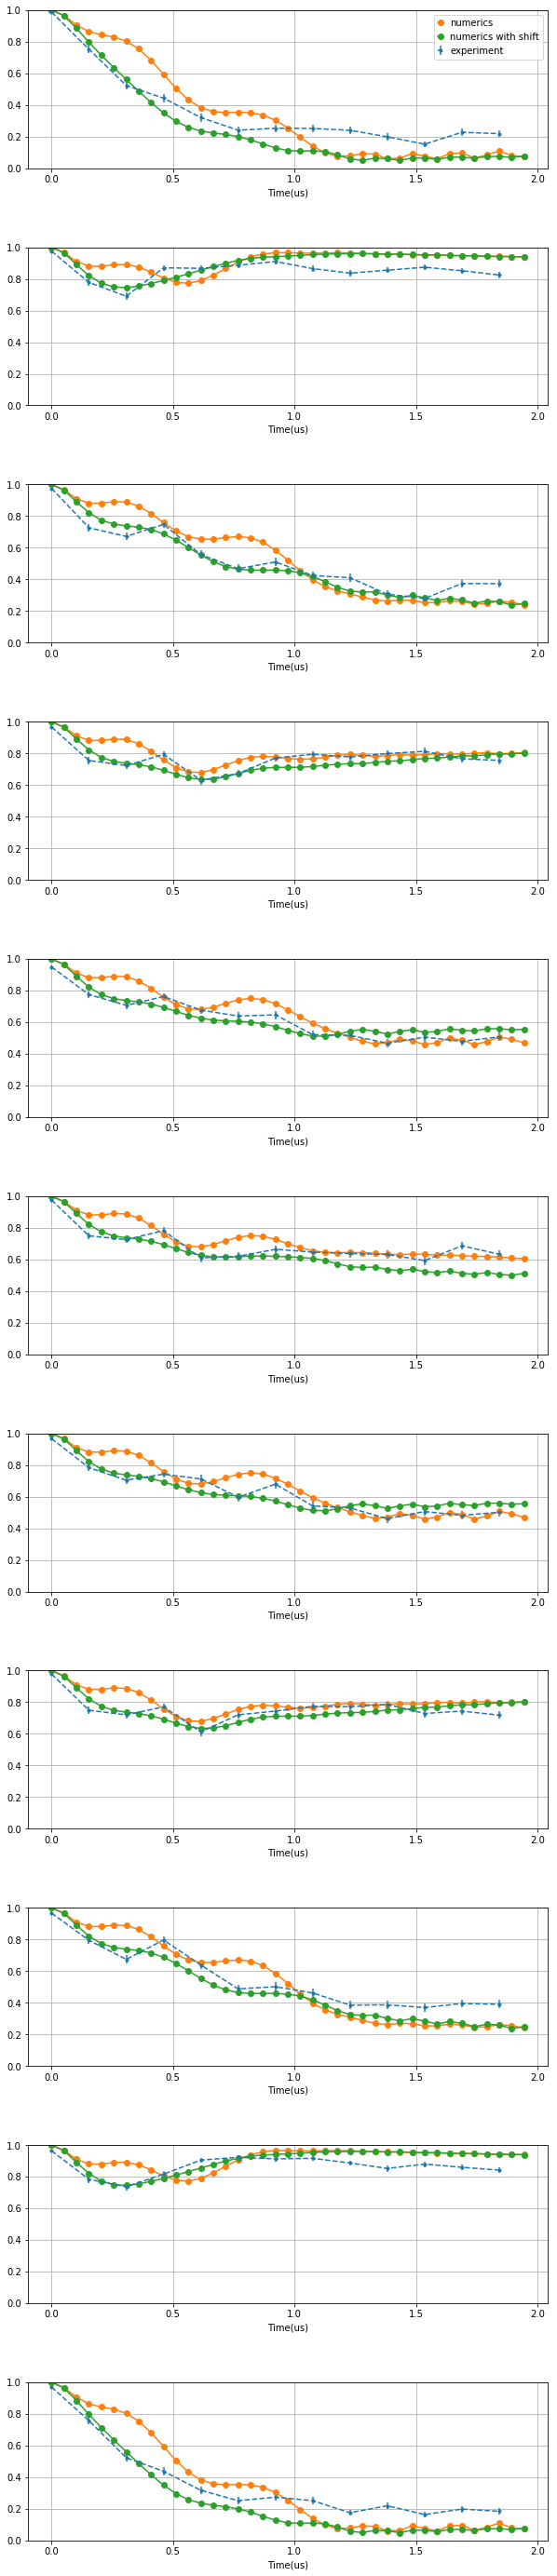

In [23]:
#11*1
data_exp = np.loadtxt('./rydberg_data/9_9_1d_dynamics_sweep/11_1_20220908213549timescan.csv',delimiter=',')
#data = {}
#sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0
# for params in [(11,1,0.0,-4,5,0.722,4,0.051,0)]:
#     data[params] = {}
#     data[params]['z'] = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_dt%.3f_No%d.csv"%params,delimiter=',')
params = (11,1,0.0,-4,5,0.722,4,0.051,0)
dt = params[7]
#temp = data[params]['z']
fig,ax = plt.subplots(ncols=1,nrows=11,figsize=(10,50))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    ax[i].errorbar(data_exp[0,:]*1e6,data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(np.arange(0,39,1)*0.0512,1-(temp[:,i]+1)/2,marker='o',label='numerics')
    ax[i].plot(np.arange(0,39,1)*0.0512,1-(temp_shift[:,i]+1)/2,marker='o',label='numerics with shift')

    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
    ax[i].set_xticks([0,0.5,1,1.5,2])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    #ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)
plt.savefig('11_1.png')
plt.show()

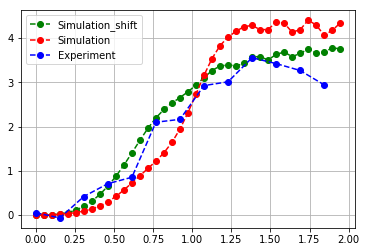

In [25]:
#temp[site,time]
Lt = len(data_exp[0,:])
site = 11
Lt2 = len(temp)
sigma_sim = np.zeros(Lt2)
sigma_sim_shift = np.zeros(Lt2)

sigma_exp = np.zeros(Lt)
data_exp_survival = data_exp[1:12,:]
x1 = data_exp[0,:]*1e6
x2 = np.arange(0,39,1)*0.0512
for j in range(Lt):
    for i in range(site-1-1):
        sigma_exp[j] = sigma_exp[j]+(data_exp_survival[i,j]-data_exp_survival[i+1,j])*(-1)**(i+1)
data_sim=1-(temp+1)/2
data_sim_shift=1-(temp_shift+1)/2
#print(data_sim)
for j2 in range(Lt2):
    for i in range(site-1-1):
        j=0
        sigma_sim[j2] = sigma_sim[j2]+(data_sim[j2,i]-data_sim[j2,i+1])*(-1)**(i+1)
        sigma_sim_shift[j2] = sigma_sim_shift[j2]+(data_sim_shift[j2,i]-data_sim_shift[j2,i+1])*(-1)**(i+1)
plt.plot(x2, sigma_sim_shift, color='g',marker='o',linestyle='dashed',label='Simulation_shift')
plt.plot(x2, sigma_sim, color='r',marker='o',linestyle='dashed',label='Simulation')
plt.plot(x1, sigma_exp, color='b',marker='o',linestyle='dashed',label='Experiment')
plt.legend()
plt.grid()
plt.savefig('11_1_order.png')

In [52]:
# for data 20220908190807
temp = np.array([[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-0.9383684981080533, -0.9393921432680215, -0.9394350858959167, -0.939439001423483, -0.9394397088815608, -0.9394398390415626, -0.9394397088815608, -0.9394390014234829, -0.9394350858959164, -0.939392143268021, -0.9383684981080532], [-0.9738979335309512, -0.9769843845778017, -0.9771740230344665, -0.9771884363871668, -0.9771913194366216, -0.9771918871192713, -0.9771913194366219, -0.9771884363871666, -0.9771740230344662, -0.9769843845778006, -0.9738979335309511], [-0.983094607706626, -0.9801146243055691, -0.9799438252543814, -0.9799330412155313, -0.9799305183226916, -0.9799299905982777, -0.9799305183226915, -0.9799330412155316, -0.9799438252543817, -0.9801146243055702, -0.9830946077066263], [-0.9070860213388262, -0.9077388212721819, -0.9081839632840104, -0.9082350597584107, -0.9082403787427914, -0.9082411425028317, -0.9082403787427914, -0.9082350597584109, -0.9081839632840102, -0.9077388212721822, -0.9070860213388251], [-0.9257236825313897, -0.9392806259858172, -0.940407144082016, -0.9404795820934274, -0.9404905148493792, -0.9404928609244242, -0.9404905148493793, -0.9404795820934271, -0.940407144082015, -0.939280625985815, -0.925723682531387], [-0.9808082429535884, -0.9866839308717739, -0.9862776349772437, -0.9862066729748716, -0.9862005239277771, -0.9861999539349005, -0.9862005239277772, -0.9862066729748714, -0.986277634977244, -0.9866839308717738, -0.9808082429535879], [-0.9465010263630222, -0.9316542365498328, -0.9306857956772737, -0.9307199867422196, -0.9307229266366085, -0.9307219284957111, -0.9307229266366082, -0.9307199867422201, -0.9306857956772747, -0.9316542365498354, -0.9465010263630242], [-0.8571638729103053, -0.8462913682800994, -0.8488570321800186, -0.8493429118279673, -0.8493843323785837, -0.849388155583823, -0.8493843323785838, -0.8493429118279678, -0.8488570321800178, -0.8462913682801008, -0.8571638729103059], [-0.8118113917830928, -0.8375737179479078, -0.8444750898486935, -0.8450696736023737, -0.845087095754087, -0.8450901428202457, -0.8450870957540877, -0.8450696736023738, -0.8444750898486897, -0.8375737179479048, -0.8118113917830891], [-0.8356647957150103, -0.8976321889439685, -0.9029525146503977, -0.902616291625636, -0.90250796463479, -0.9025007665514742, -0.902507964634791, -0.902616291625636, -0.9029525146503938, -0.897632188943963, -0.8356647957150034], [-0.8773189373095888, -0.9402753804784586, -0.9361686565481614, -0.9346601734007348, -0.9345230286899552, -0.9345196423231711, -0.9345230286899563, -0.9346601734007349, -0.9361686565481606, -0.9402753804784566, -0.8773189373095835], [-0.8791591392351622, -0.9055062759882077, -0.891100442176728, -0.890083015405984, -0.8902288980847443, -0.8902557005291141, -0.8902288980847446, -0.8900830154059846, -0.891100442176731, -0.9055062759882115, -0.8791591392351625], [-0.8249264424052435, -0.8077063898069214, -0.792553747735104, -0.7946718308073464, -0.7952925073440934, -0.7953390692877795, -0.7952925073440921, -0.794671830807347, -0.7925537477351079, -0.8077063898069285, -0.8249264424052483], [-0.7394068204521369, -0.7108135172177552, -0.7087247923717316, -0.7152740252685112, -0.7160692092813281, -0.7160571307234648, -0.7160692092813259, -0.7152740252685119, -0.7087247923717324, -0.7108135172177595, -0.739406820452142], [-0.6599303860767957, -0.6718336448938436, -0.6905364058376171, -0.699510100500149, -0.6996314440424671, -0.6994483512905338, -0.6996314440424646, -0.6995101005001509, -0.6905364058376138, -0.6718336448938405, -0.659930386076797], [-0.609673728895937, -0.7043085342008999, -0.7382356288821175, -0.7443748524244508, -0.742885425698144, -0.7424976580339439, -0.742885425698142, -0.7443748524244549, -0.7382356288821125, -0.7043085342008899, -0.609673728895933], [-0.5868256963659291, -0.7768529677018512, -0.806877709503319, -0.8041683413728731, -0.800935822169137, -0.8005344906469944, -0.8009358221691365, -0.8041683413728791, -0.8068777095033156, -0.7768529677018389, -0.5868256963659207], [-0.5728894916873055, -0.8403094238013081, -0.839851341555174, -0.8257188947170756, -0.8222672319994344, -0.822312877408153, -0.8222672319994357, -0.8257188947170818, -0.8398513415551738, -0.8403094238012991, -0.572889491687296], [-0.5480287668434329, -0.8571119388805681, -0.8033481255024514, -0.7826484991695584, -0.7821486415533165, -0.7831439280701341, -0.7821486415533186, -0.7826484991695631, -0.8033481255024543, -0.8571119388805666, -0.5480287668434254], [-0.5046050262366578, -0.8208837151777546, -0.7065257606134039, -0.6921540432299255, -0.6978497104176546, -0.6998382576103497, -0.6978497104176558, -0.692154043229927, -0.7065257606134088, -0.820883715177761, -0.5046050262366537], [-0.4503626357216106, -0.7544727080071929, -0.5931801517586932, -0.6012643441014972, -0.613844389663319, -0.6159830674730533, -0.6138443896633178, -0.6012643441014949, -0.5931801517586974, -0.7544727080072053, -0.4503626357216084], [-0.40203993980731795, -0.693931696554213, -0.5154828822369122, -0.5573438367598785, -0.5731619576675356, -0.5738414523225651, -0.5731619576675321, -0.5573438367598736, -0.5154828822369135, -0.693931696554227, -0.40203993980731556], [-0.37418338106779875, -0.6670403429886252, -0.5038822686215503, -0.5796868527435992, -0.591262040183384, -0.5888325804606367, -0.591262040183379, -0.5796868527435934, -0.5038822686215481, -0.667040342988636, -0.3741833810677936], [-0.36977365038254184, -0.679886115363947, -0.5539684196334005, -0.6517316029354905, -0.6501203306344189, -0.6438418825931824, -0.650120330634414, -0.6517316029354865, -0.5539684196333953, -0.6798861153639513, -0.3697736503825329], [-0.3790082056095211, -0.7177403738417444, -0.6321791970751012, -0.7318054407167027, -0.7097706246620801, -0.7007125797117171, -0.7097706246620771, -0.731805440716703, -0.6321791970750947, -0.7177403738417424, -0.37900820560951043], [-0.3844704227443831, -0.7552845348124309, -0.6943959618277089, -0.7745161412847474, -0.7299332799196623, -0.7217388427379908, -0.729933279919662, -0.7745161412847533, -0.6943959618277035, -0.7552845348124244, -0.38447042274437426], [-0.3709558384440874, -0.772081264604926, -0.7087023212354403, -0.7544764262526247, -0.6931629448756707, -0.6920753318167028, -0.6931629448756715, -0.7544764262526353, -0.7087023212354383, -0.772081264604918, -0.37095583844408386], [-0.3334642747670409, -0.7621292998551925, -0.6688285327930636, -0.6779776224607663, -0.6138878410510703, -0.6270437426036325, -0.6138878410510709, -0.6779776224607788, -0.6688285327930654, -0.7621292998551854, -0.3334642747670456], [-0.2790899393218451, -0.7350258583421487, -0.5958751007612451, -0.5799815880730006, -0.5308291767076698, -0.5628742230753498, -0.5308291767076687, -0.5799815880730104, -0.5958751007612493, -0.7350258583421446, -0.27908993932185844], [-0.22335449013120573, -0.7090420951710846, -0.5246050128363857, -0.5043237667125162, -0.484019378289495, -0.5338189383215517, -0.48401937828949115, -0.5043237667125207, -0.5246050128363904, -0.709042095171083, -0.22335449013122502], [-0.1814431590752843, -0.6996999444100637, -0.48433486793897257, -0.48087192902996817, -0.49310453463717757, -0.5528439045361535, -0.493104534637171, -0.4808719290299664, -0.48433486793897695, -0.6996999444100623, -0.18144315907530428], [-0.160540451647959, -0.712095272842123, -0.4850516456407452, -0.5129544538047202, -0.5492427073167039, -0.6064959939141086, -0.5492427073166961, -0.5129544538047142, -0.4850516456407485, -0.7120952728421205, -0.16054045164797426], [-0.15712970524916448, -0.7394539364326558, -0.5137839533144384, -0.577976586553227, -0.6203625319884915, -0.6615875778509128, -0.6203625319884849, -0.5779765865532196, -0.5137839533144416, -0.7394539364326507, -0.1571297052491717], [-0.15911191374106504, -0.7679572254592986, -0.5445744572705459, -0.6419840235150089, -0.6685307020597856, -0.6825533793591354, -0.6685307020597818, -0.6419840235150022, -0.5445744572705501, -0.7679572254592921, -0.15911191374106445], [-0.15229451034683567, -0.7846823344004921, -0.5522411707866928, -0.6760921894809604, -0.6677539795953956, -0.648996737292408, -0.6677539795953958, -0.6760921894809561, -0.552241170786699, -0.7846823344004856, -0.15229451034682887], [-0.12668103157276228, -0.7838405570459857, -0.5246350615654163, -0.6688336754290714, -0.6162267022799541, -0.5674146975218715, -0.6162267022799581, -0.6688336754290707, -0.5246350615654247, -0.7838405570459808, -0.12668103157275198], [-0.0800165962521759, -0.7686187079214679, -0.46760507549121466, -0.6295844950156424, -0.5367426182648002, -0.46985184600804714, -0.536742618264807, -0.6295844950156444, -0.4676050754912241, -0.7686187079214655, -0.08001659625216564], [-0.017852496090928843, -0.74856777159409, -0.39891593944625997, -0.5794415407449378, -0.46192709187689507, -0.3958569472241832, -0.46192709187690295, -0.5794415407449404, -0.39891593944626735, -0.7485677715940906, -0.01785249609092238], [0.05053510636118277, -0.7340080488202727, -0.3382463482167901, -0.5391563538324442, -0.4166157483907369, -0.3718512801228795, -0.41661574839074333, -0.5391563538324453, -0.33824634821679356, -0.734008048820276, 0.050535106361184676], [0.11706991077261661, -0.7308589646304737, -0.2970171074676363, -0.5191230267442121, -0.4059964850863534, -0.3988448014147536, -0.4059964850863562, -0.5191230267442111, -0.29701710746763504, -0.7308589646304794, 0.11706991077261536], [0.17822058529447768, -0.7392993764547819, -0.2733807445878771, -0.5159354527609683, -0.4150542389634768, -0.45441539665208375, -0.4150542389634752, -0.5159354527609663, -0.27338074458787237, -0.7392993764547889, 0.17822058529447554], [0.23620288017804558, -0.7549726814760842, -0.2551246864009013, -0.5179803445721545, -0.41917844685634653, -0.507001289326841, -0.41917844685634065, -0.5179803445721528, -0.2551246864008946, -0.7549726814760913, 0.2362028801780441], [0.29692119771192743, -0.7719431406835316, -0.2259695857197373, -0.5131841500136408, -0.39643411670034534, -0.53077160628192, -0.3964341167003361, -0.5131841500136406, -0.22596958571973047, -0.771943140683538, 0.2969211977119277], [0.3659362204536766, -0.7864953206254726, -0.1733677143053589, -0.49606944967387184, -0.33733385644702596, -0.5161115396768319, -0.3373338564470152, -0.49606944967387523, -0.17336771430535325, -0.786495320625477, 0.365936220453679], [0.4449291857080832, -0.7981164056482766, -0.0945509479656024, -0.47149788362054457, -0.24908864835475786, -0.4729481325019418, -0.2490886483547467, -0.4714978836205515, -0.09455094796559788, -0.7981164056482788, 0.44492918570808754], [0.529694416849925, -0.8083284980875768, 0.0032299574652840408, -0.4506125052195107, -0.15025730381888447, -0.4233269396480944, -0.15025730381887448, -0.4506125052195201, 0.0032299574652889657, -0.8083284980875771, 0.5296944168499298], [0.6105735722169965, -0.8193453018136492, 0.1068750917934608, -0.4425634259000305, -0.0597142183145558, -0.38806848081012446, -0.059714218314546874, -0.44256342590004166, 0.1068750917934681, -0.8193453018136482, 0.6105735722169989], [0.6761259083716028, -0.8321745152710985, 0.20255561530247979, -0.44853761397211844, 0.012572180229085905, -0.3757240860868343, 0.012572180229093621, -0.44853761397213016, 0.20255561530249105, -0.8321745152710973, 0.6761259083716014], [0.7195539554323683, -0.8458342709652423, 0.27944300745818806, -0.46132162772928365, 0.06802724687604686, -0.3791430599598315, 0.06802724687605405, -0.46132162772929525, 0.279443007458203, -0.8458342709652411, 0.7195539554323631], [0.7450327904343712, -0.8582469533047861, 0.3313349934004982, -0.47087972969650504, 0.11397320346816181, -0.3813781510373891, 0.11397320346816861, -0.47087972969651626, 0.33133499340051425, -0.8582469533047842, 0.7450327904343657], [0.7670176899135863, -0.8675940982714607, 0.3567216005849327, -0.4722404200249482, 0.1525293167491764, -0.36798832366044937, 0.15252931674918196, -0.4722404200249594, 0.356721600584946, -0.8675940982714583, 0.767017689913583], [0.7969353486896879, -0.8741060588800161, 0.35928433023235923, -0.46924230299101594, 0.17022540587575893, -0.33972757036448475, 0.17022540587576437, -0.4692423029910281, 0.3592843302323682, -0.8741060588800131, 0.7969353486896866], [0.8279384782937491, -0.8800710612028715, 0.35259144897289213, -0.46875044584464837, 0.14826626742355237, -0.31369502759959134, 0.14826626742355767, -0.4687504458446611, 0.3525914489729011, -0.8800710612028687, 0.8279384782937473], [0.8445151064721657, -0.8872244398655729, 0.3617246907810683, -0.4706758545388529, 0.10652450430162086, -0.30224307126026184, 0.1065245043016266, -0.47067585453886507, 0.3617246907810824, -0.8872244398655702, 0.8445151064721618], [0.8544557849165458, -0.894410514946223, 0.3977874570112988, -0.4728527706413967, 0.11151956722325587, -0.29398189245866807, 0.11151956722326054, -0.4728527706414083, 0.39778745701131457, -0.8944105149462207, 0.8544557849165431], [0.8739422258054096, -0.8994268711838322, 0.425344591334481, -0.4790441424077981, 0.16211345199733487, -0.27575952580185503, 0.16211345199733773, -0.47904414240780935, 0.42534459133449076, -0.89942687118383, 0.8739422258054079], [0.8817703808590265, -0.9031351413974593, 0.4175298990265616, -0.48550487337511067, 0.14538762001031255, -0.26459284795380733, 0.14538762001031613, -0.48550487337512127, 0.417529899026573, -0.9031351413974573, 0.881770380859024], [0.8868192383917968, -0.9070379415999437, 0.4314002382239266, -0.4878706034527905, 0.11561481658734235, -0.259396272825742, 0.1156148165873454, -0.4878706034528022, 0.43140023822394136, -0.9070379415999421, 0.8868192383917952], [0.8986860187123732, -0.9093922615746171, 0.45144431771624116, -0.4953810789128621, 0.15529442020718356, -0.24254419296611487, 0.15529442020718565, -0.4953810789128742, 0.4514443177162524, -0.9093922615746155, 0.898686018712372], [0.8952621447034129, -0.9112540110613736, 0.44553491090606656, -0.49985530583410137, 0.11308117876862489, -0.24119630922892002, 0.11308117876862733, -0.4998553058341141, 0.44553491090608277, -0.9112540110613724, 0.8952621447034117], [0.903369376753449, -0.9123573052600231, 0.4681839297128254, -0.5079513691420974, 0.14240405811426823, -0.2260616132557775, 0.14240405811426907, -0.5079513691421093, 0.46818392971283684, -0.9123573052600225, 0.9033693767534482], [0.8971838097020483, -0.9131177625148412, 0.46068046161507503, -0.5135587693356405, 0.11300766850287447, -0.22522652383940356, 0.11300766850287589, -0.5135587693356521, 0.46068046161509, -0.9131177625148407, 0.8971838097020476], [0.9049827463146778, -0.9135086614767435, 0.4811089068988951, -0.5221802335239821, 0.12325287619617781, -0.21065553363323392, 0.12325287619617784, -0.5221802335239937, 0.48110890689890584, -0.9135086614767434, 0.9049827463146776], [0.8961703533141776, -0.9132341386851722, 0.4777573208387761, -0.5295363748054386, 0.11458481583230251, -0.20961896880576528, 0.1145848158323032, -0.5295363748054491, 0.47775732083878963, -0.9132341386851722, 0.8961703533141774], [0.9039554505729444, -0.9120694759765486, 0.49292010455023294, -0.5378323876463974, 0.10405371076116648, -0.196843497474444, 0.10405371076116632, -0.5378323876464066, 0.4929201045502412, -0.9120694759765492, 0.903955450572945], [0.8926857459525699, -0.9099895021468882, 0.4974284416189688, -0.5448443070958393, 0.11436075898232709, -0.19385939428600388, 0.11436075898232706, -0.5448443070958469, 0.49742844161897887, -0.909989502146889, 0.8926857459525706], [0.9004418946041799, -0.90733919370123, 0.5070370148593779, -0.552282839326558, 0.09258969672011144, -0.18434249332876282, 0.09258969672011136, -0.5522828393265646, 0.5070370148593843, -0.907339193701231, 0.900441894604181], [0.8870032417426708, -0.9045569926768001, 0.5164363709470909, -0.5593017213047349, 0.1089539405838916, -0.1797124447926672, 0.10895394058389143, -0.5593017213047401, 0.5164363709470975, -0.9045569926768015, 0.8870032417426718], [0.895074837740428, -0.9017422910832635, 0.5220615157165706, -0.5674397635666124, 0.08993544496340894, -0.1750660212093099, 0.08993544496340977, -0.5674397635666157, 0.522061515716574, -0.9017422910832651, 0.8950748377404296], [0.8801773588874658, -0.899056713682787, 0.5314966100334273, -0.5750465986264455, 0.0968472038609873, -0.16883694944184038, 0.09684720386098647, -0.575046598626447, 0.5314966100334286, -0.8990567136827883, 0.8801773588874672]])
len(temp)

71

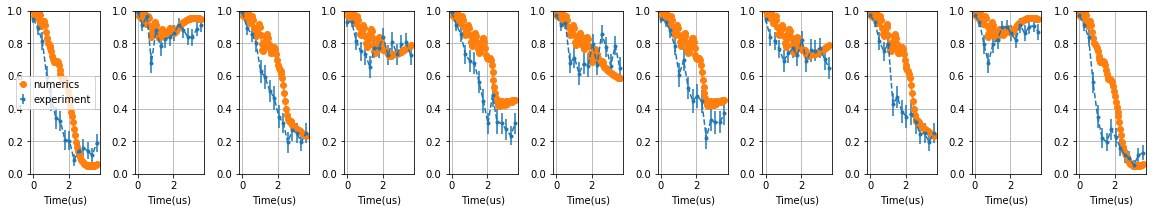

In [53]:
#11*1
data_exp = np.loadtxt('./rydberg_data/9_9_1d_dynamics_sweep/11_1_20220908190807timescan.csv',delimiter=',')
#data = {}
#sweeptime_z_L11_1_den0.000_delta-4.0_5.0_omega0.722_dt0.051_No0
# for params in [(11,1,0.0,-4,5,0.722,4,0.051,0)]:
#     data[params] = {}
#     data[params]['z'] = np.loadtxt("./rydberg_data/9_8_1d_ramptime_sweep/sweeptime_z_L%d_%d_den%.3f_delta%.1f_%.1f_omega%.3f_dt%.3f_No%d.csv"%params,delimiter=',')
params = (11,1,0.0,-4,5,0.722,4,0.051,0)
dt = params[7]
#temp = data[params]['z']
fig,ax = plt.subplots(ncols=11,nrows=1,figsize=(20,3))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(11):
    #print(temp[:,i])
    ax[i].errorbar(data_exp[0,:]*1e6,data_exp[i+1,:],yerr=data_exp[i+11+1,:],ls='--',marker='.',label='experiment')
    ax[i].plot(np.arange(0,71,1)*0.0512,1-(temp[:,i]+1)/2,marker='o',label='numerics')
    #plt.legend(handlelength=0.5,ncol=3)
    #plt.text(20,0.75,'size=3*5',fontsize=25)
    ax[i].set_ylim([0,1])
   # ax[i].set_xticks([0,0.5,1,1.5,2])
   # ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

    #ax[i/3,i%3].set_xlim([0,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    #ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)

plt.show()

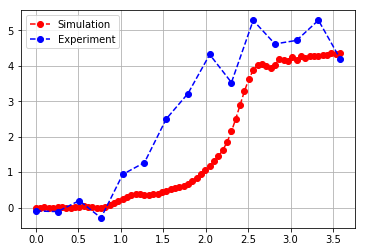

In [54]:
#temp[site,time]
Lt = len(data_exp[0,:])
site = 11
Lt2 = len(temp)
sigma_sim = np.zeros(Lt2)
sigma_exp = np.zeros(Lt)
data_exp_survival = data_exp[1:12,:]
x1 = data_exp[0,:]*1e6
x2 = np.arange(0,Lt2,1)*0.0512
for j in range(Lt):
    for i in range(site-1-1):
        sigma_exp[j] = sigma_exp[j]+(data_exp_survival[i,j]-data_exp_survival[i+1,j])*(-1)**(i+1)
data_sim=1-(temp+1)/2

#print(data_sim)
for j2 in range(Lt2):
    for i in range(site-1-1):
        j=0
        sigma_sim[j2] = sigma_sim[j2]+(data_sim[j2,i]-data_sim[j2,i+1])*(-1)**(i+1)
        #sigma_sim[j2] = (sigma_sim[j2]+(data_sim[j2,i]-data_sim[j2,i+1])*(-1)**(i+1)
plt.plot(x2, sigma_sim, color='r',marker='o',linestyle='dashed',label='Simulation')
plt.plot(x1, sigma_exp, color='b',marker='o',linestyle='dashed',label='Experiment')
plt.legend()
plt.grid()
